In [306]:
# pip install tensorflow keras

In [1]:
import numpy as np
import pandas as pd
from keras.layers import GRU
from keras.optimizers import SGD
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [2]:
from tvDatafeed import TvDatafeed,Interval

In [3]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [4]:
niftydf = tv.get_hist(symbol='NIFTY_50', exchange='NSE', interval=Interval.in_daily,n_bars=5000)

In [5]:
niftydf.to_csv('data.csv')

In [6]:
niftydf.tail()

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-10-20 09:15:00,NSE:NIFTY_50,17423.100,17584.15,17421.00,17563.949,249604832.0
2022-10-21 09:15:00,NSE:NIFTY_50,17622.850,17670.15,17520.75,17576.301,277702680.0
2022-10-24 18:15:00,NSE:NIFTY_50,17736.350,17777.55,17707.40,17730.750,45029477.0
2022-10-25 09:15:00,NSE:NIFTY_50,17808.301,17811.50,17637.00,17656.350,251358203.0
2022-10-27 09:15:00,NSE:NIFTY_50,17771.400,17783.90,17704.50,17707.050,178739833.0


In [7]:
niftydf

,symbol,open,high,low,close,volume
datetime,,,,,,
2002-08-16 09:15:00,NSE:NIFTY_50,970.75000,981.20001,968.34998,979.25000,33890001.0
2002-08-19 09:15:00,NSE:NIFTY_50,979.40002,983.54999,978.20001,979.84998,29703999.0
2002-08-20 09:15:00,NSE:NIFTY_50,979.75000,990.84998,979.04999,988.54999,41503998.0
2002-08-21 09:15:00,NSE:NIFTY_50,988.59998,994.25000,984.34998,988.45001,55111000.0
2002-08-22 09:15:00,NSE:NIFTY_50,988.54999,995.29999,983.45001,985.70001,40654000.0
...,...,...,...,...,...,...
2022-10-20 09:15:00,NSE:NIFTY_50,17423.10000,17584.15000,17421.00000,17563.94900,249604832.0
2022-10-21 09:15:00,NSE:NIFTY_50,17622.85000,17670.15000,17520.75000,17576.30100,277702680.0
2022-10-24 18:15:00,NSE:NIFTY_50,17736.35000,17777.55000,17707.40000,17730.75000,45029477.0


In [8]:
stock_prices = niftydf.close.values.astype('float32')
stock_prices = stock_prices.reshape(5000, 1)
stock_prices.shape

(5000, 1)

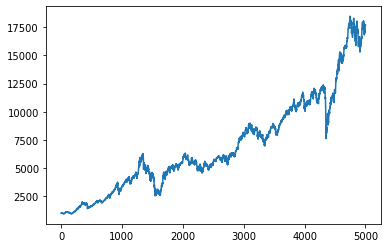

In [9]:
plt.plot(stock_prices)
plt.show()


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices = scaler.fit_transform(stock_prices)

In [26]:
train_size = int(len(stock_prices) * 0.90)
test_size = len(stock_prices) - train_size
train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]
print(len(train), len(test))

4500 500


In [27]:
stock_prices

array([[0.00322143],
       [0.0032556 ],
       [0.00375121],
       ...,
       [0.9574864 ],
       [0.953248  ],
       [0.9561362 ]], dtype=float32)

In [28]:
# stock_prices[0: 1, 0], stock_prices[1, 0], stock_prices[:, 0]

In [29]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [30]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
testX, testY

(array([[[0.62512994, 0.62706107, 0.61779845, 0.6247284 , 0.61562514]],
 
        [[0.62706107, 0.61779845, 0.6247284 , 0.61562514, 0.61227554]],
 
        [[0.61779845, 0.6247284 , 0.61562514, 0.61227554, 0.61065775]],
 
        ...,
 
        [[0.926437  , 0.9336205 , 0.943598  , 0.9450393 , 0.94798434]],
 
        [[0.9336205 , 0.943598  , 0.9450393 , 0.94798434, 0.94868803]],
 
        [[0.943598  , 0.9450393 , 0.94798434, 0.94868803, 0.9574864 ]]],
       dtype=float32),
 array([0.61227554, 0.61065775, 0.6121816 , 0.6204046 , 0.6258164 ,
        0.63788176, 0.6460421 , 0.6572929 , 0.6669799 , 0.6737048 ,
        0.67038083, 0.6720414 , 0.67547643, 0.6808284 , 0.68447703,
        0.6749894 , 0.6799653 , 0.68380487, 0.69113636, 0.67992836,
        0.68725413, 0.6862259 , 0.69420683, 0.6944746 , 0.69562244,
        0.7027232 , 0.7082603 , 0.7103795 , 0.71813536, 0.7152415 ,
        0.7172666 , 0.7197902 , 0.72034276, 0.7268853 , 0.7301894 ,
        0.73132014, 0.70670235, 0.7145579 ,

In [33]:
model = Sequential()

# model.add(LSTM(
#     50,
#     return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(
#     100,
#     return_sequences=False))
# model.add(Dropout(0.2))

# model.add(Dense(
#     output_dim=1))
# model.add(Activation('linear'))
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1],look_back)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

start = time.time()
# model.compile(loss='mse', optimizer='rmsprop')
model.compile(optimizer='adam', 
              loss='mean_squared_error')
print ('compilation time : ', time.time() - start)

compilation time :  0.03099346160888672


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 50)             11200     
                                                                 
 dropout_3 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [35]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.hdf5', verbose = 2, save_best_only = True)

In [36]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=25,
    callbacks=[checkpointer],
    validation_split=0.05)

Epoch 1/25
30/34 [=========================>....] - ETA: 0s - loss: 0.0649
Epoch 1: val_loss improved from inf to 0.03556, saving model to model.hdf5
34/34 [==============================] - 11s 89ms/step - loss: 0.0602 - val_loss: 0.0356
Epoch 2/25
29/34 [========================>.....] - ETA: 0s - loss: 0.0120
Epoch 2: val_loss improved from 0.03556 to 0.00496, saving model to model.hdf5
34/34 [==============================] - 0s 14ms/step - loss: 0.0114 - val_loss: 0.0050
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 0.0040
Epoch 3: val_loss improved from 0.00496 to 0.00046, saving model to model.hdf5
34/34 [==============================] - 0s 13ms/step - loss: 0.0040 - val_loss: 4.6334e-04
Epoch 4/25
28/34 [=======================>......] - ETA: 0s - loss: 0.0023
Epoch 4: val_loss did not improve from 0.00046
34/34 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 9.1501e-04
Epoch 5/25
32/34 [===========================>..] - ETA: 0s 

In [70]:
model.save('model.hdf5')

In [23]:
from keras.models import load_model

model = load_model('model.hdf5')

In [37]:
testX

array([[[0.62512994, 0.62706107, 0.61779845, 0.6247284 , 0.61562514]],

       [[0.62706107, 0.61779845, 0.6247284 , 0.61562514, 0.61227554]],

       [[0.61779845, 0.6247284 , 0.61562514, 0.61227554, 0.61065775]],

       ...,

       [[0.926437  , 0.9336205 , 0.943598  , 0.9450393 , 0.94798434]],

       [[0.9336205 , 0.943598  , 0.9450393 , 0.94798434, 0.94868803]],

       [[0.943598  , 0.9450393 , 0.94798434, 0.94868803, 0.9574864 ]]],
      dtype=float32)

In [44]:
def predict(l = 1):
    return model.predict(testX[:100])

In [39]:
scaler.inverse_transform(testX[-1])

array([[0.94359785, 0.94503915, 0.9479842 , 0.9486879 , 0.9574863 ]],
      dtype=float32)

In [40]:
model.predict(np.array([testX[-2]]))

1/1 [==============================] - 2s 2s/step


array([[0.77468187]], dtype=float32)

In [41]:
scaler.inverse_transform([[0.78776765]])

array([[0.78776756]])

In [42]:
temp = predict(1)

16/16 [==============================] - 0s 3ms/step


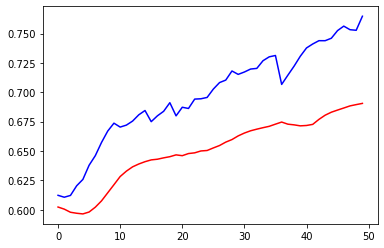

In [46]:
plt.plot(scaler.inverse_transform(temp[:50]), color='red', label='Predicted Stock Price')
plt.plot(scaler.inverse_transform(testY[:50].reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.show()

In [81]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(trainX.shape[1],look_back), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(trainX.shape[1],look_back), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(trainX.shape[1],look_back), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [82]:
regressorGRU.compile(optimizer='adam', 
              loss='mean_squared_error')

regressorGRU.fit(trainX,
    trainY,
    batch_size=128,
    epochs=25,
    callbacks=[checkpointer],
    validation_split=0.05)

Epoch 1/25
33/34 [============================>.] - ETA: 0s - loss: 0.0382
Epoch 1: val_loss did not improve from 0.00014
34/34 [==============================] - 24s 141ms/step - loss: 0.0380 - val_loss: 0.0498
Epoch 2/25
31/34 [==========================>...] - ETA: 0s - loss: 0.0074
Epoch 2: val_loss did not improve from 0.00014
34/34 [==============================] - 1s 20ms/step - loss: 0.0071 - val_loss: 0.0014
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 0.0025
Epoch 3: val_loss did not improve from 0.00014
34/34 [==============================] - 1s 20ms/step - loss: 0.0025 - val_loss: 4.2270e-04
Epoch 4/25
31/34 [==========================>...] - ETA: 0s - loss: 0.0021
Epoch 4: val_loss did not improve from 0.00014
34/34 [==============================] - 1s 20ms/step - loss: 0.0021 - val_loss: 2.0743e-04
Epoch 5/25
34/34 [==============================] - ETA: 0s - loss: 0.0018
Epoch 5: val_loss did not improve from 0.00014
34/34 [=====================

In [88]:
def predictGRU(l = 1):
    return regressorGRU.predict(np.array(testX[: 100]))

tt = predictGRU(1)

4/4 [==============================] - 0s 9ms/step


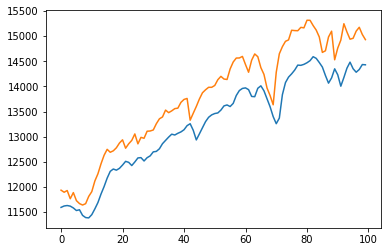

In [89]:
plt.plot(scaler.inverse_transform(tt))
plt.plot(scaler.inverse_transform(testY[:100].reshape(-1, 1)))
plt.show()

In [87]:
test = scaler.transform([[17971], [18846], [17038], [17215], [17331]])

In [146]:
test

array([[0.97117229],
       [1.02101748],
       [0.91802308],
       [0.92810605],
       [0.93471409]])

In [147]:
test = test.reshape(1, 5)

In [148]:
model.predict(np.array([test]))

1/1 [==============================] - 0s 63ms/step


array([[0.80638385]], dtype=float32)

In [150]:
scaler.inverse_transform([[0.80638385]])

array([[15078.24575829]])